**Exercise 1.1**

Here I just modify a bit the guessing game template provided by GPT. To make it more interesting, added max number of attempt.

Here is the GPT link: https://chatgpt.com/share/68b83d90-3194-8008-a9b1-b435b90b4db0

In [4]:
import random

def guessgame():
  num_to_guess = random.randint(1, 100)
  attempt = 0

  print("Number guessing game! Guess the number between 1 and 100 in less than 5 guesses.")

  while attempt < 5:
    try:
      guess = int(input("Enter your guess: "))
      attempt += 1

      if guess == num_to_guess:
        print(f"Congrats! You guess {num_to_guess} in {attempt} attempts.")
        break
      elif guess < num_to_guess:
        print("Too low!")
      else:
        print("Too high!")

    except ValueError:
      print("Enter a valid number!")

# Main
guessgame()

Number guessing game! Guess the number between 1 and 100 in less than 5 guesses.
Enter your guess: 40
Too low!
Enter your guess: 75
Too high!
Enter your guess: 60
Too low!
Enter your guess: 68
Too high!
Enter your guess: 65
Congrats! You guess 65 in 5 attempts.


**Exercise 1.2**

Load MNIST and set batch size.

In [5]:
from logging import root
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# MNIST dataset
data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
)

test_loader_batch = DataLoader(data, batch_size=64)


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.46MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.55MB/s]


Predicted labels: [5 5 5 5 5 5 5 5]
True labels     : [3 4 1 2 7 6 9 3]


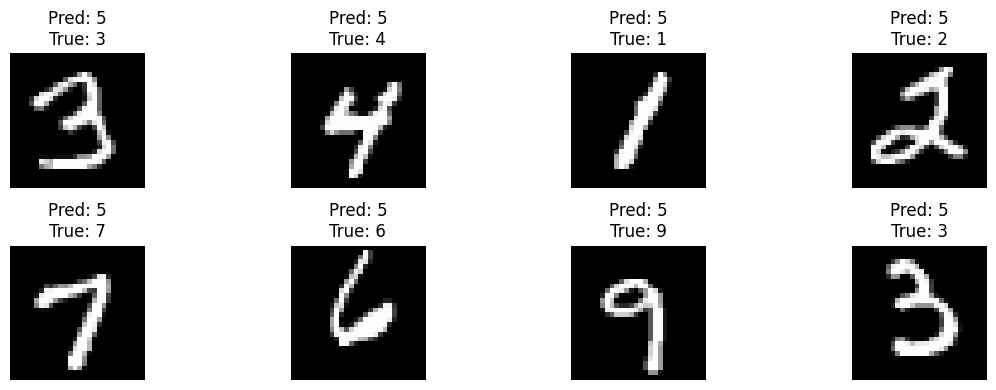

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ------------------------
# CNN model
# ------------------------
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # First block
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2)  # -> (B, 8, 14, 14)
        )

        # Second block
        self.conv2 = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2)  # -> (B, 32, 7, 7)
        )

        # Third block
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
        )

        # Fully connected
        self.fc = nn.Linear(64 * 7 * 7, 10)  # -> 10 classes

    def forward(self, x):
        x = self.conv1(x)              # (B, 8, 14, 14)
        x = self.conv2(x)              # (B, 32, 7, 7)
        x = self.conv3(x)              # (B, 64, 7, 7)
        x = torch.flatten(x, 1)        # (B, 64*7*7)
        x = self.fc(x)                 # (B, 10)
        return x

# ------------------------
# Load MNIST dataset
# ------------------------
transform = transforms.Compose([transforms.ToTensor()])
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)  # small batch for demo

# ------------------------
# Run model on sample batch
# ------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

# Get a batch of test data
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Forward pass
outputs = model(images)

# Convert outputs to predicted classes
_, predicted = torch.max(outputs, 1)

# ------------------------
# Show results
# ------------------------
print("Predicted labels:", predicted.cpu().numpy())
print("True labels     :", labels.cpu().numpy())

# Plot images with labels
plt.figure(figsize=(12, 4))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i].cpu().squeeze(), cmap="gray")
    plt.title(f"Pred: {predicted[i].item()}\nTrue: {labels[i].item()}")
    plt.axis("off")

plt.tight_layout()
plt.show()


1. ReLu vs Leaky ReLu: relu is simple activation function where the value is more than the threshold, it will boosted. Otherwise, will be just 0. But in Leaky ReLu, instead of directly put 0, it still give a small negative slope (alpha = 0.01 for example); which will reduce the neurons stuck problem (not learning).  

2. Activation function is a mechanism to enable the network to "learn" non-linearly. Otherwise, CNN will be just linear combinations of inputs (like single matrix multiplication). Other than ReLu and Leaky ReLu, we got sigmoid, Tanh, and softmax (which normalizes output into a probability distribution).

3. It's just means that load the test dataset instead of training dataset. WHile the ToTensor() will converts images or numpy arrays into PyTorch tensors and scales pixel values from (0-255) to (0-1).

4. The batch size is the number of samples processed together before updating the model weights once. Let it be 60K samples with 128 batch size, each epoch will process 60K/128 = 469 batches. Larger batch size means faster training (more paralell) but of course more memory needed, but smaller means more updates, and may generalize better.

5. Max Pooling 2D is producing maximum value inside the 2x2 window across the feature map. We could also say downsmapling the feature maps for fewer parameters, which means faster computations.

6. Lastly, a fully connected (dense) layer connects every input neuron to every output neuron. Usually comes after convolution and pooling layers to combine extracted features into final predictions. In classification (e.g., MNIST digits), the last fully connected layer maps features → 10 output neurons (digits 0-9).


GPT ref link: https://chatgpt.com/share/68b84fbf-e094-8008-abe0-d26580683042